In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
from torchviz import make_dot
from lib.timegan import *
from lib.data import *
from options import *
import mplfinance as mpf


In [2]:
SEQ_LENGTH = 1024  # Longueur des séries temporelles
LATENT_DIM = 64    # Dimension de l'espace latent
BATCH_SIZE = 32
EPOCHS = 30000
SEQS = 1000
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
df = pd.read_pickle('assets/binance_BTC_USDT.zip')
size = df.shape[0]
deb_max = size - SEQ_LENGTH

arr=[]
for i in range(SEQS):
    deb = np.random.randint(0, deb_max)
    df2 = df.iloc[deb:deb+SEQ_LENGTH+1]
    # close = df2.close.array
    close = df2.close.pct_change().dropna().array
    close = 2 * (close - close.min()) / (close.max() - close.min()) - 1
    arr.append(close)

arr = np.array(arr)
data = arr.reshape((SEQS, 1, SEQ_LENGTH)).astype(np.float32)
# print(arr)
print(arr.shape)


(1000, 1024)


In [2]:
opt = Options().parse()

opt.resume = './output/TimeGAN/stock/train/weights'

ori_data = load_data(opt)

# LOAD MODEL
model = TimeGAN(opt, ori_data)


stock dataset is ready.

Loading pre-trained networks.
	Done.



c:\repositories\TimeGAN-pytorch\lib\timegan.py:274: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.opt.iter = torch.load(os.path.join(self.opt.resume, 'netG.pth'))['epoc

In [9]:
datagen = model.generation(2)

print(datagen.shape)
print(datagen)

(2, 24, 6)
[[[0.21030493 0.21199791 0.21259698 0.20997331 0.20998381 0.06981008]
  [0.21084318 0.21254085 0.21314227 0.2105144  0.21052501 0.06963907]
  [0.24230161 0.24427237 0.2449517  0.24210989 0.24212471 0.06171841]
  [0.20990066 0.2115919  0.21218741 0.2095667  0.20957713 0.07001299]
  [0.23236838 0.23425265 0.23493961 0.23215395 0.2321678  0.06360697]
  [0.21201827 0.213724   0.21433287 0.21169612 0.21170692 0.06917906]
  [0.23342985 0.23532242 0.23601279 0.23322006 0.23323406 0.06333257]
  [0.21458626 0.2163116  0.21693666 0.21428001 0.21429126 0.06825993]
  [0.20981297 0.21150307 0.21209817 0.20947826 0.2094887  0.07002896]
  [0.23442566 0.23632976 0.23701535 0.23421702 0.23423108 0.06323151]
  [0.21002562 0.21171702 0.21231399 0.20969236 0.20970283 0.06993537]
  [0.21108446 0.21278211 0.21338684 0.21075729 0.21076794 0.06947806]
  [0.24323763 0.2452148  0.24589503 0.24304813 0.24306303 0.06150457]
  [0.3003087  0.30274802 0.30301968 0.29997858 0.29999405 0.05364354]
  [0.2106

                         Open      High       Low     Close
date                                                       
2010-01-01 00:00:00  0.069413  0.069482  0.067900  0.067982
2010-01-01 01:00:00  0.069364  0.069431  0.067855  0.067934
2010-01-01 02:00:00  0.082108  0.082294  0.080879  0.080865
2010-01-01 03:00:00  0.069642  0.069712  0.068140  0.068217
2010-01-01 04:00:00  0.073883  0.073991  0.072470  0.072521
2010-01-01 05:00:00  0.069040  0.069105  0.067525  0.067605
2010-01-01 06:00:00  0.074265  0.074379  0.072832  0.072899
2010-01-01 07:00:00  0.068263  0.068323  0.066720  0.066812
2010-01-01 08:00:00  0.069650  0.069720  0.068145  0.068223
2010-01-01 09:00:00  0.075435  0.075560  0.074029  0.074087
2010-01-01 10:00:00  0.069497  0.069566  0.067984  0.068066
2010-01-01 11:00:00  0.069113  0.069179  0.067587  0.067675
2010-01-01 12:00:00  0.082372  0.082563  0.081129  0.081126
2010-01-01 13:00:00  0.305574  0.308869  0.305982  0.304757
2010-01-01 14:00:00  0.069246  0.069314 

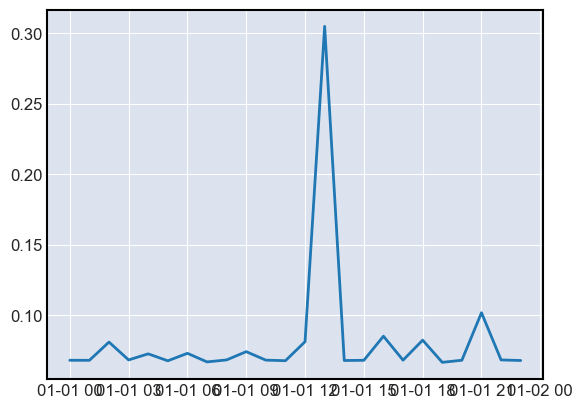

In [10]:

df = pd.DataFrame(datagen[1][:, :4])
df.columns = ['Open','High','Low','Close']
df['date'] = pd.date_range(start='2010-01-01', periods=len(df), freq='h')
df = df.set_index('date')


print(df)
# mpf.plot(df, volume=False, type='candle')
# plt.show()

plt.plot(df.Close)
plt.show()
